# Unsupervised Feature Extraction

## Emotion Face Classifier Notebook 4

Use unsupervised learning to generate key features of emotion classes. 

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
import pandas as pd

from datascifuncs.tidbit_tools import load_json, write_json, print_json, check_directory_name

In [4]:
main_dir = 'EmotionFaceClassifier'
check_directory_name(main_dir)

Directory set to /Users/dsl/Documents/GitHub/EmotionFaceClassifier, matches target dir string EmotionFaceClassifier.


True

In [5]:
from utils.preprocessing import (
    preprocess_images,
    plot_face_matrix
)

In [6]:
from utils.feature_extraction import (
    generate_analysis_paths,
    run_single_analysis
)

In [7]:
# Read in FER 2013 data
fer2013_path = 'data/fer2013_paths.csv'
fer2013 = pd.read_csv(fer2013_path)

In [8]:
fer2013.head()

,emotion_id,pixels,Usage,emotion,image,usage,emo_count_id,img_path,color
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training,Angry,[[ 70 80 82 ... 52 43 41]\n [ 65 61 58 ...,Training,1,data/Training/Angry/Angry-1.jpg,red
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training,Angry,[[151 150 147 ... 129 140 120]\n [151 149 149 ...,Training,2,data/Training/Angry/Angry-2.jpg,red
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training,Fear,[[231 212 156 ... 44 27 16]\n [229 175 148 ...,Training,1,data/Training/Fear/Fear-1.jpg,slategray
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training,Sad,[[ 24 32 36 ... 173 172 173]\n [ 25 34 29 ...,Training,1,data/Training/Sad/Sad-1.jpg,blue
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training,Neutral,[[ 4 0 0 ... 27 24 25]\n [ 1 0 0 ... 26 23...,Training,1,data/Training/Neutral/Neutral-1.jpg,sienna


In [9]:
# Load common dicts from json config file
common_dicts = load_json('./configs/input_mappings.json')
# print_json(common_dicts)

In [10]:
# Get subset of emo-color mappings
color_dict = common_dicts['color_dict']
color_dict

{'Overall': 'black',
 'Angry': 'red',
 'Disgust': 'olive',
 'Fear': 'slategray',
 'Happy': 'gold',
 'Sad': 'blue',
 'Surprise': 'darkviolet',
 'Neutral': 'sienna'}

In [11]:
X_train, y_train = preprocess_images(fer2013, usage='Training', flatten=True)

In [12]:
model_dict = load_json('configs/unsupervised_models.json')

In [13]:
model_dict

{'FastICA': {'module': 'sklearn.decomposition',
  'class': 'FastICA',
  'normalization': 'standard',
  'total_components': 100,
  'components_for_reconstruction': [1, 10, 30, 50, 100],
  'params': {'algorithm': 'parallel',
   'fun': 'logcosh',
   'max_iter': 500,
   'tol': 0.0001,
   'random_state': 42}},
 'NMF': {'module': 'sklearn.decomposition',
  'class': 'NMF',
  'normalization': 'none',
  'total_components': 100,
  'components_for_reconstruction': [1, 10, 30, 50, 100],
  'params': {'init': 'random',
   'solver': 'mu',
   'beta_loss': 'frobenius',
   'max_iter': 1000,
   'tol': 1e-05,
   'random_state': 42}},
 'PCA': {'module': 'sklearn.decomposition',
  'class': 'PCA',
  'normalization': 'standard',
  'total_components': 100,
  'components_for_reconstruction': [1, 10, 30, 50, 100],
  'params': {'svd_solver': 'randomized', 'whiten': True, 'random_state': 42}}}

Analysis settings:
{
    "module": "sklearn.decomposition",
    "class": "FastICA",
    "normalization": "standard",
    "total_components": 100,
    "components_for_reconstruction": [
        1,
        10,
        30,
        50,
        100
    ],
    "params": {
        "algorithm": "parallel",
        "fun": "logcosh",
        "max_iter": 500,
        "tol": 0.0001,
        "random_state": 42
    },
    "paths": {
        "base_dir": "models/unsupervised",
        "result_dir": "models/unsupervised/fastica_standard_100",
        "log_path": "models/unsupervised/fastica_standard_100/analysis_log.log",
        "json_path": "models/unsupervised/fastica_standard_100/analysis_details.json",
        "npz_path": "models/unsupervised/fastica_standard_100/analysis_data.npz",
        "component_path": "models/unsupervised/fastica_standard_100/component_averages_matrix.png",
        "recons_path": "models/unsupervised/fastica_standard_100/reconstruction_matrix.png"
    },
    "color_map": {


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Overall.
Shape of features is: (28709, 100).
Analysis complete for category: Overall


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Angry.
Shape of features is: (3995, 100).
Analysis complete for category: Angry


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Disgust.
Shape of features is: (436, 100).
Analysis complete for category: Disgust


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Fear.
Shape of features is: (4097, 100).
Analysis complete for category: Fear


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Happy.
Shape of features is: (7215, 100).
Analysis complete for category: Happy


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Neutral.
Shape of features is: (4965, 100).
Analysis complete for category: Neutral


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Sad.
Shape of features is: (4830, 100).
Analysis complete for category: Sad


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Running category: Surprise.
Shape of features is: (3171, 100).
Analysis complete for category: Surprise
Analysis settings saved to models/unsupervised/fastica_standard_100/analysis_details.json.
Analysis data saved to models/unsupervised/fastica_standard_100/analysis_data.npz.
Plot saved to models/unsupervised/fastica_standard_100/component_averages_matrix.png


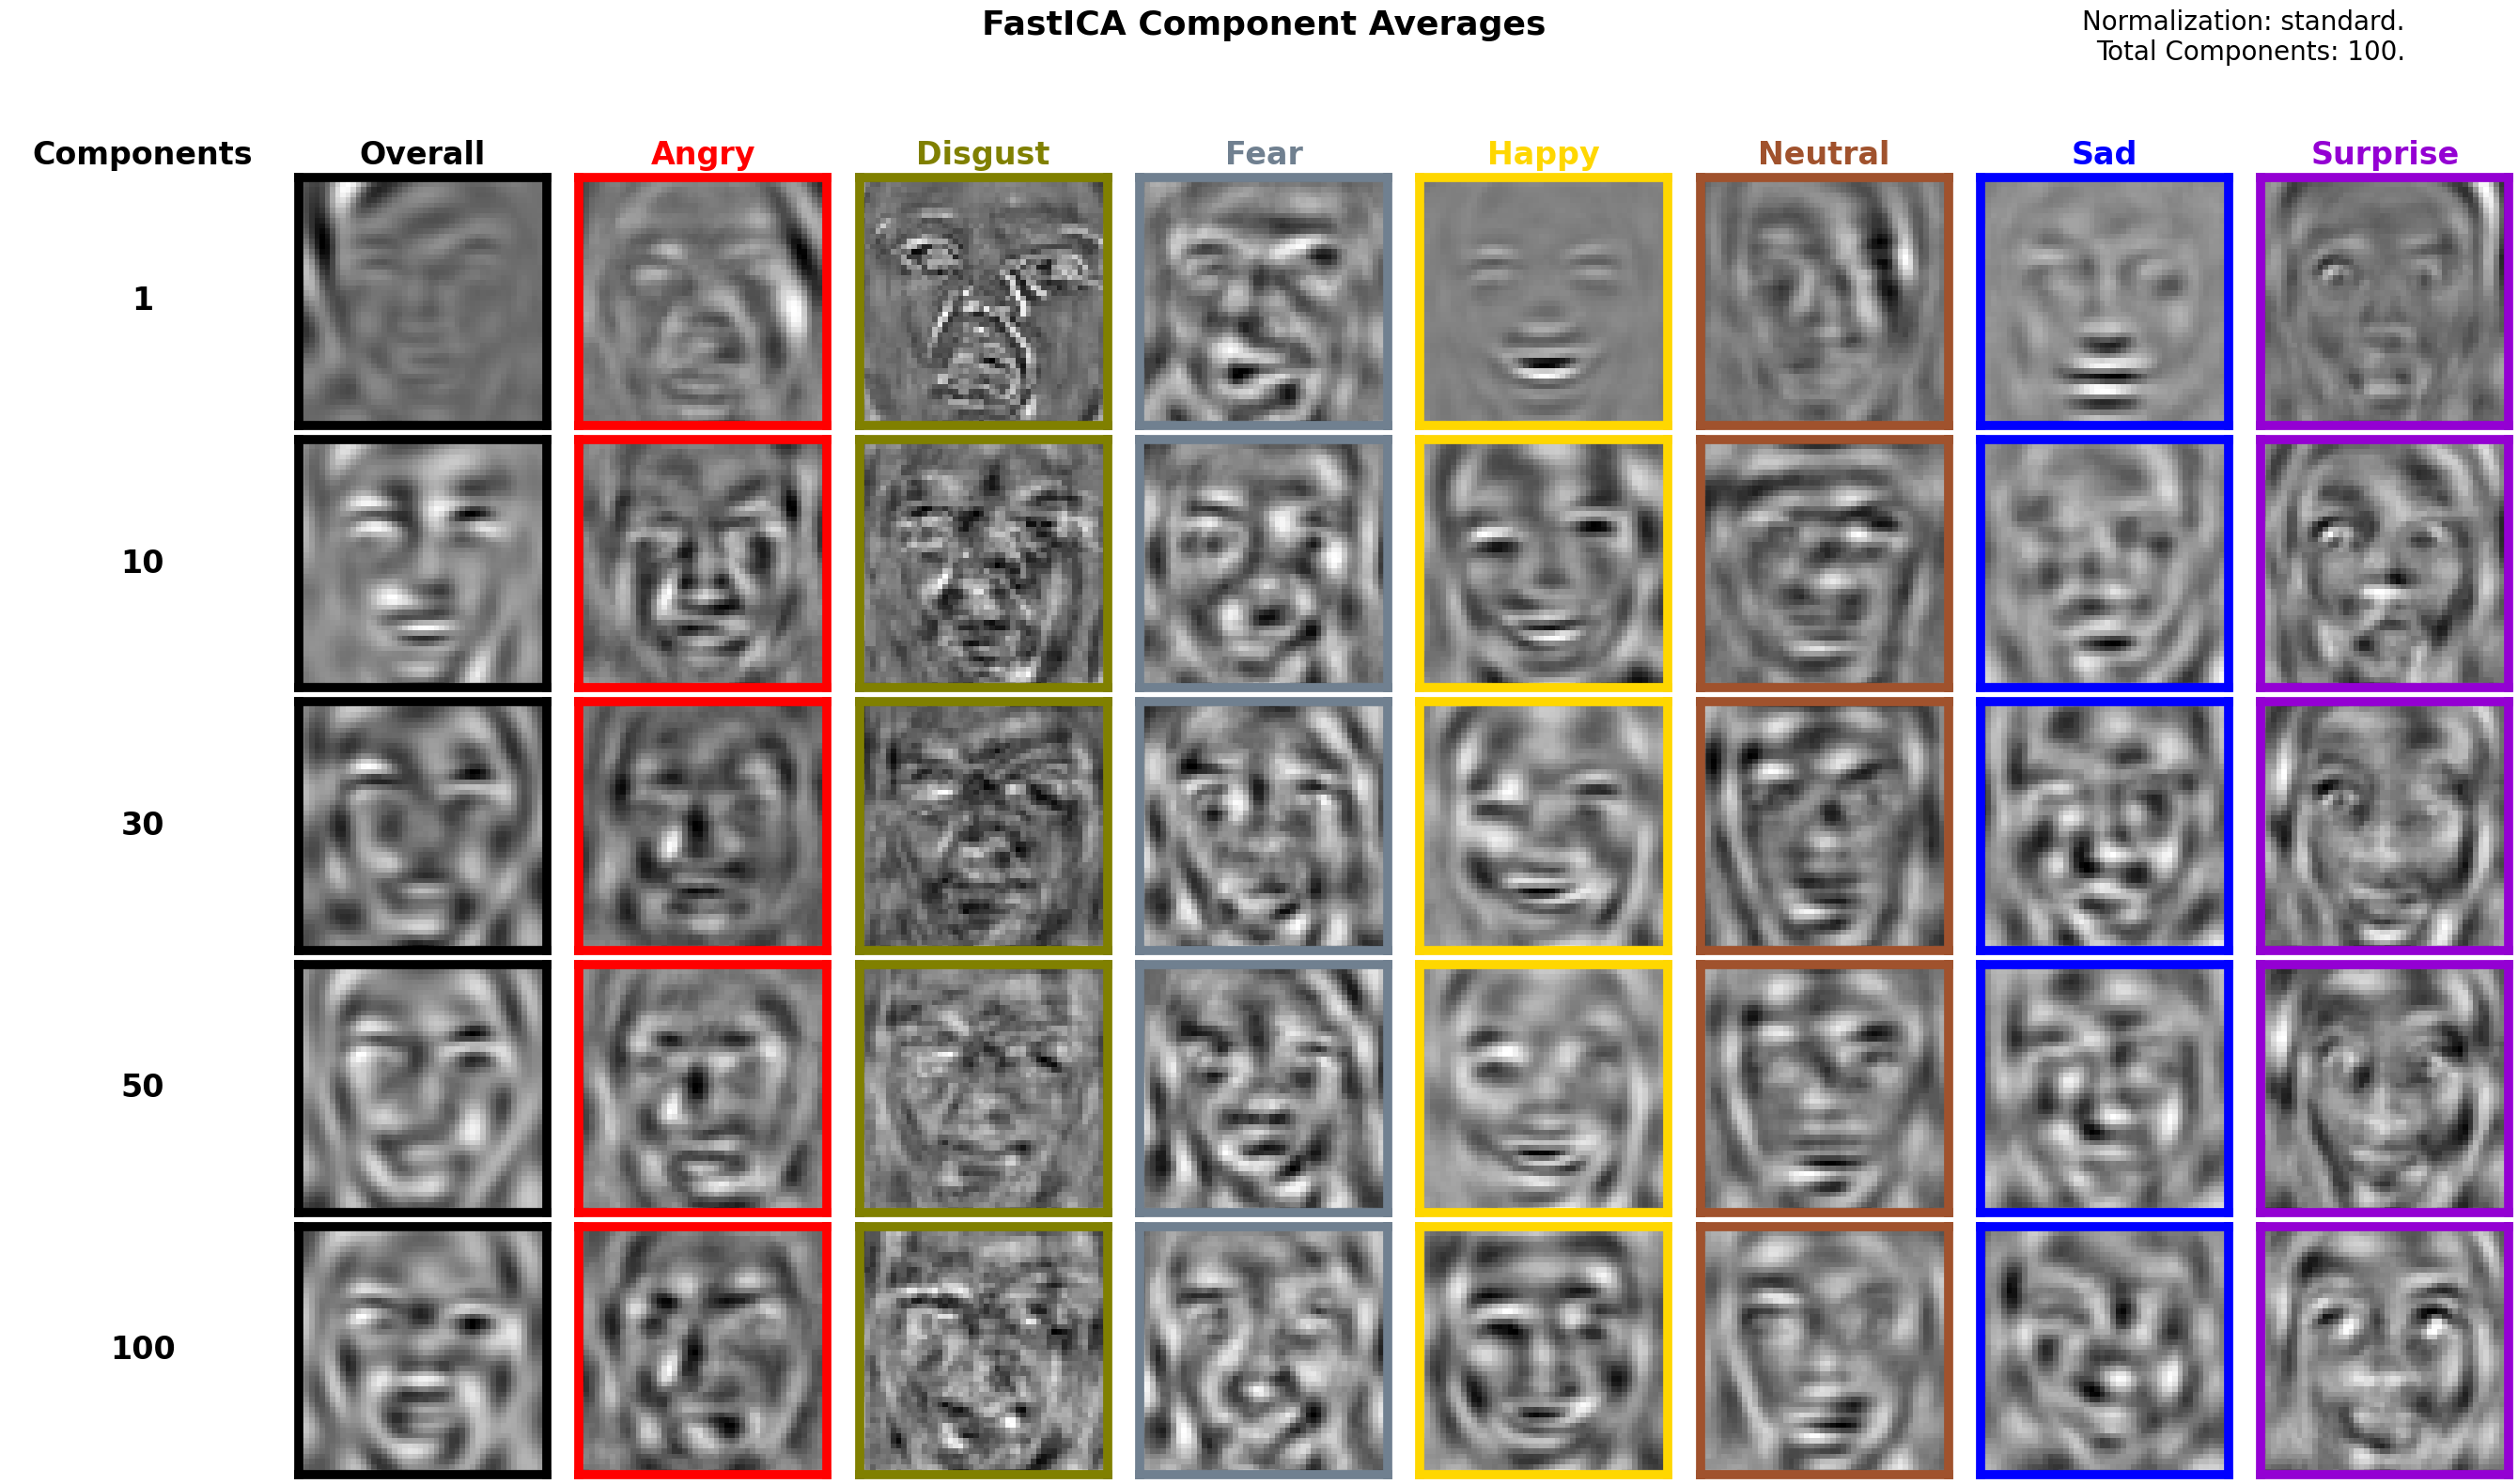

Saved matrix image of component averages to: models/unsupervised/fastica_standard_100/component_averages_matrix.png.
Plot saved to models/unsupervised/fastica_standard_100/reconstruction_matrix.png


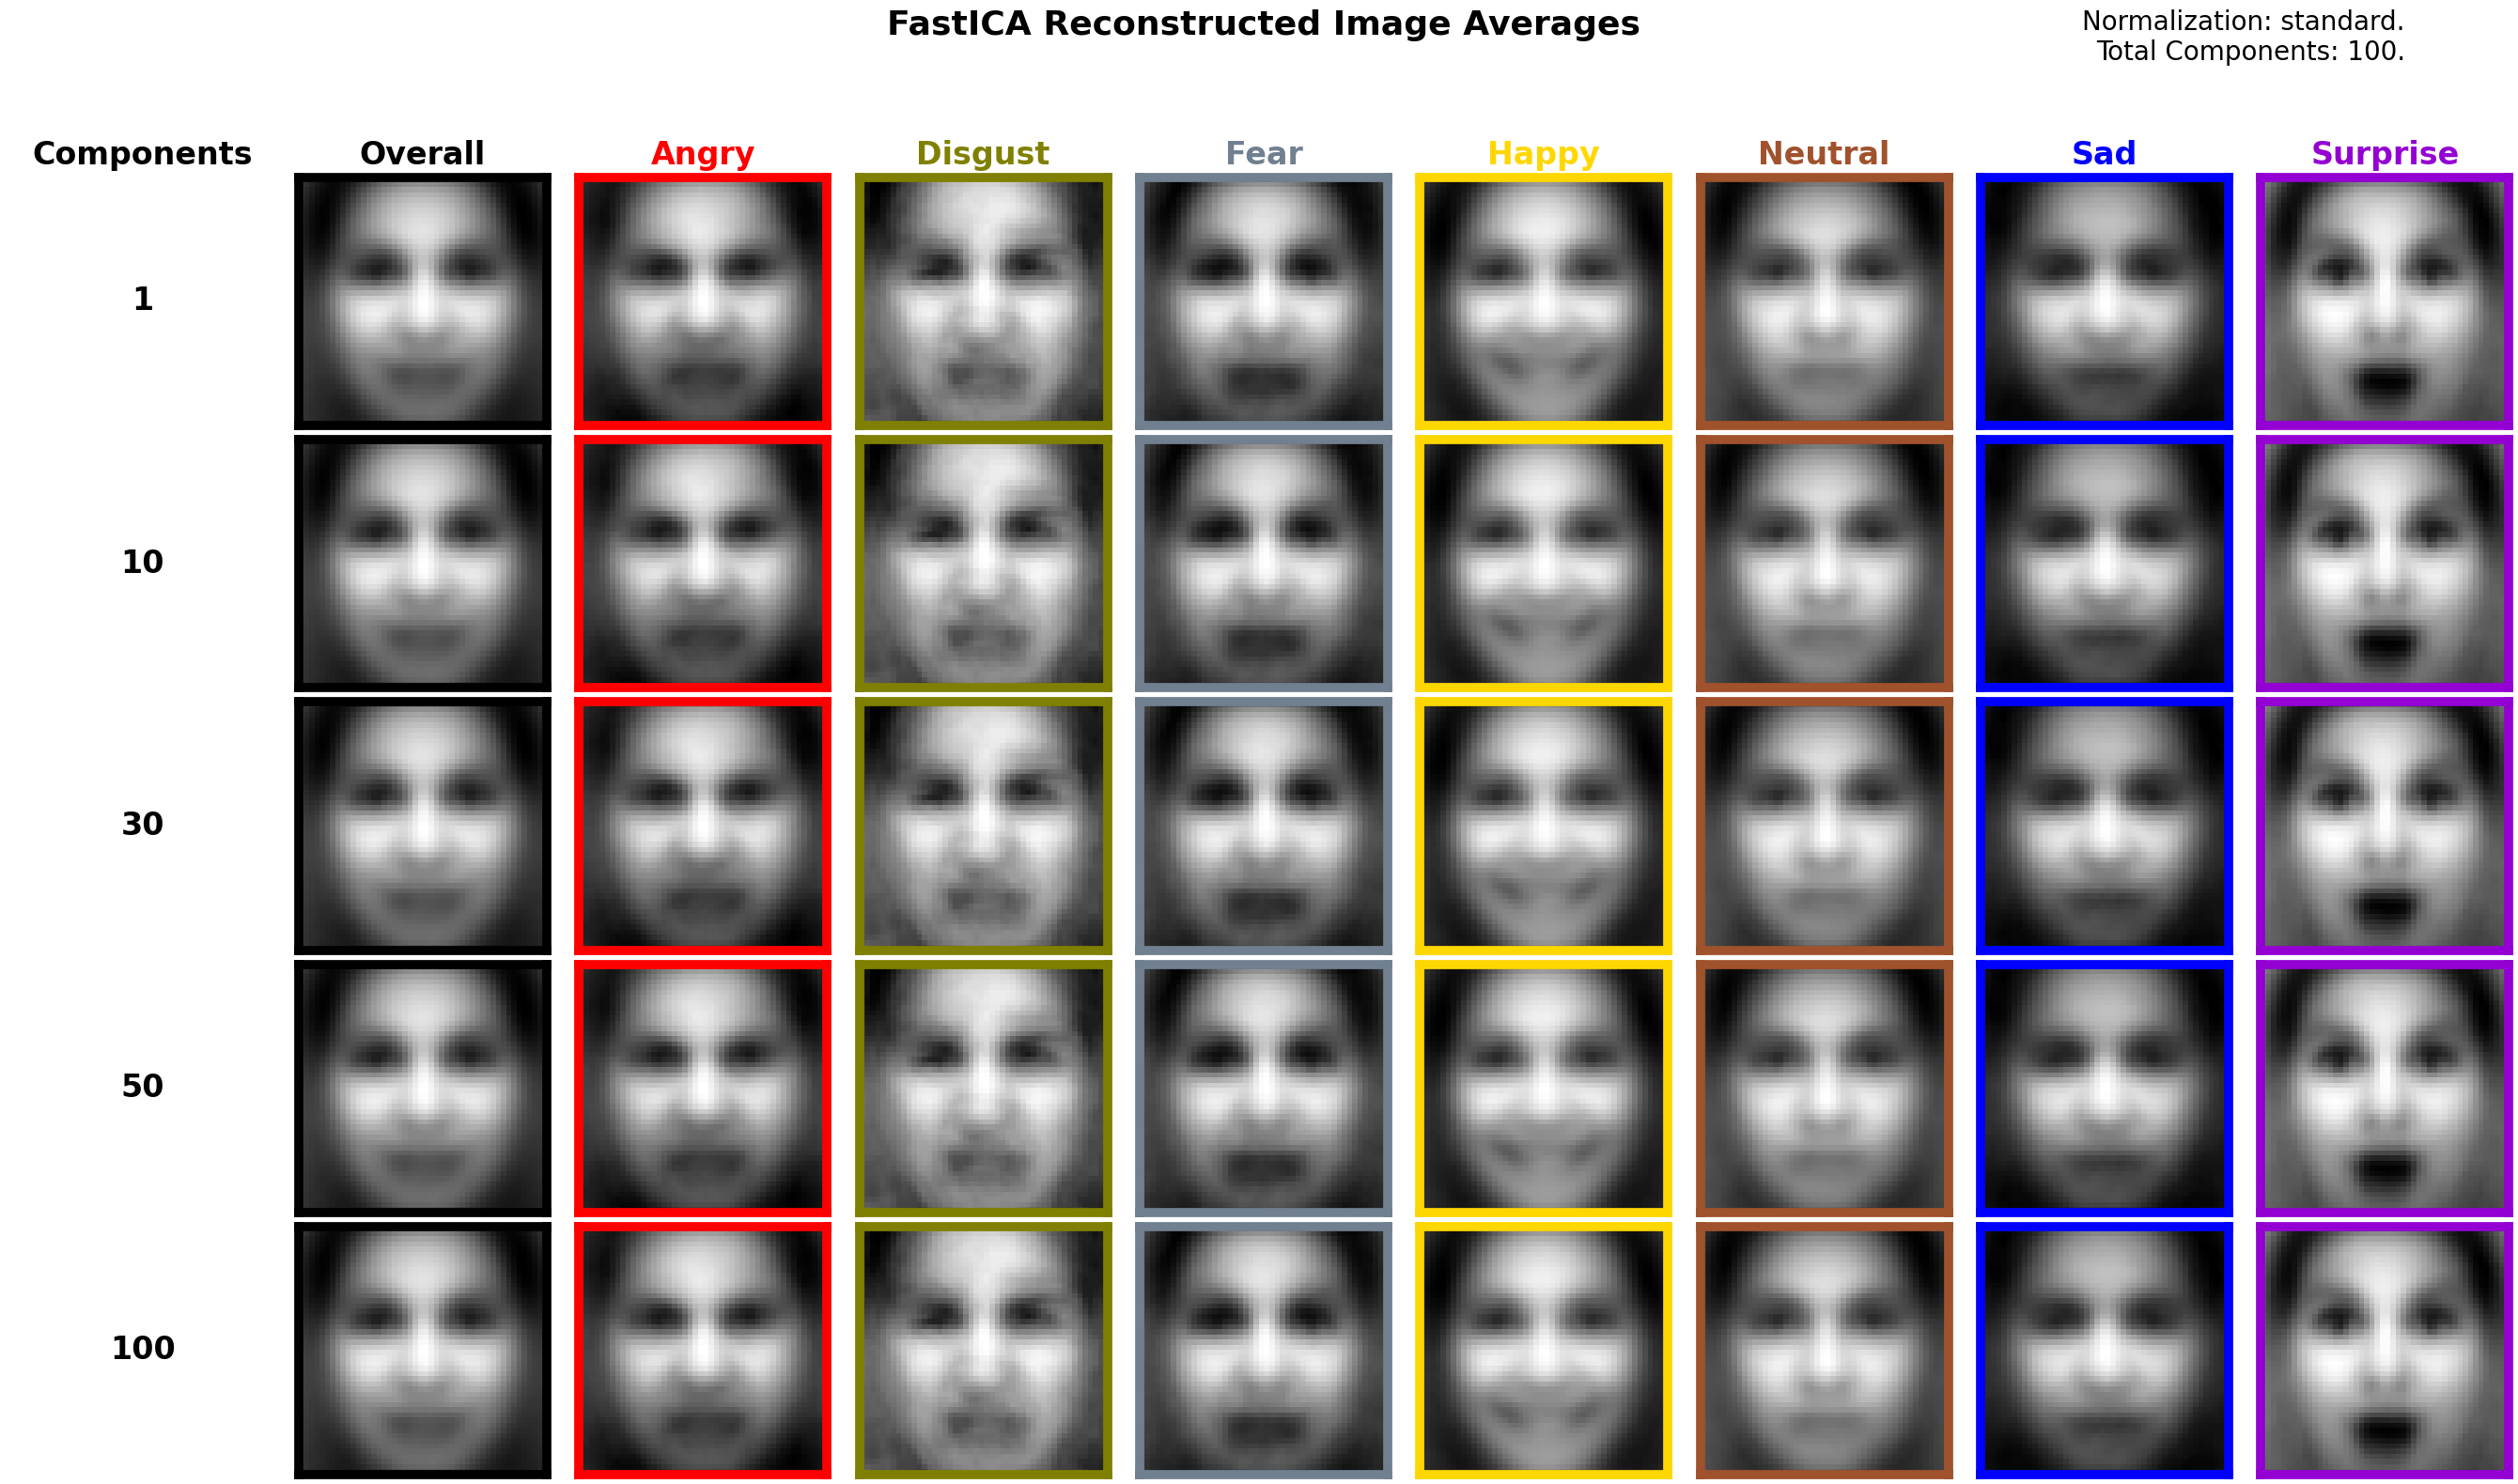

Saved matrix image of component averages to: models/unsupervised/fastica_standard_100/reconstruction_matrix.png.
Current analysis complete.
Function run_single_analysis Took 283.1056 seconds
Analysis settings:
{
    "module": "sklearn.decomposition",
    "class": "NMF",
    "normalization": "none",
    "total_components": 100,
    "components_for_reconstruction": [
        1,
        10,
        30,
        50,
        100
    ],
    "params": {
        "init": "random",
        "solver": "mu",
        "beta_loss": "frobenius",
        "max_iter": 1000,
        "tol": 1e-05,
        "random_state": 42
    },
    "paths": {
        "base_dir": "models/unsupervised",
        "result_dir": "models/unsupervised/nmf_none_100",
        "log_path": "models/unsupervised/nmf_none_100/analysis_log.log",
        "json_path": "models/unsupervised/nmf_none_100/analysis_details.json",
        "npz_path": "models/unsupervised/nmf_none_100/analysis_data.npz",
        "component_path": "models/unsuperv

/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Overall.
Shape of features is: (28709, 100).
Analysis complete for category: Overall


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Angry.
Shape of features is: (3995, 100).
Analysis complete for category: Angry


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Disgust.
Shape of features is: (436, 100).
Analysis complete for category: Disgust


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Fear.
Shape of features is: (4097, 100).
Analysis complete for category: Fear


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Happy.
Shape of features is: (7215, 100).
Analysis complete for category: Happy


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Neutral.
Shape of features is: (4965, 100).
Analysis complete for category: Neutral


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Sad.
Shape of features is: (4830, 100).
Analysis complete for category: Sad


/opt/anaconda3/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 1000 reached. Increase it to improve convergence.
  warnings.warn(


Running category: Surprise.
Shape of features is: (3171, 100).
Analysis complete for category: Surprise
Analysis settings saved to models/unsupervised/nmf_none_100/analysis_details.json.
Analysis data saved to models/unsupervised/nmf_none_100/analysis_data.npz.
Plot saved to models/unsupervised/nmf_none_100/component_averages_matrix.png


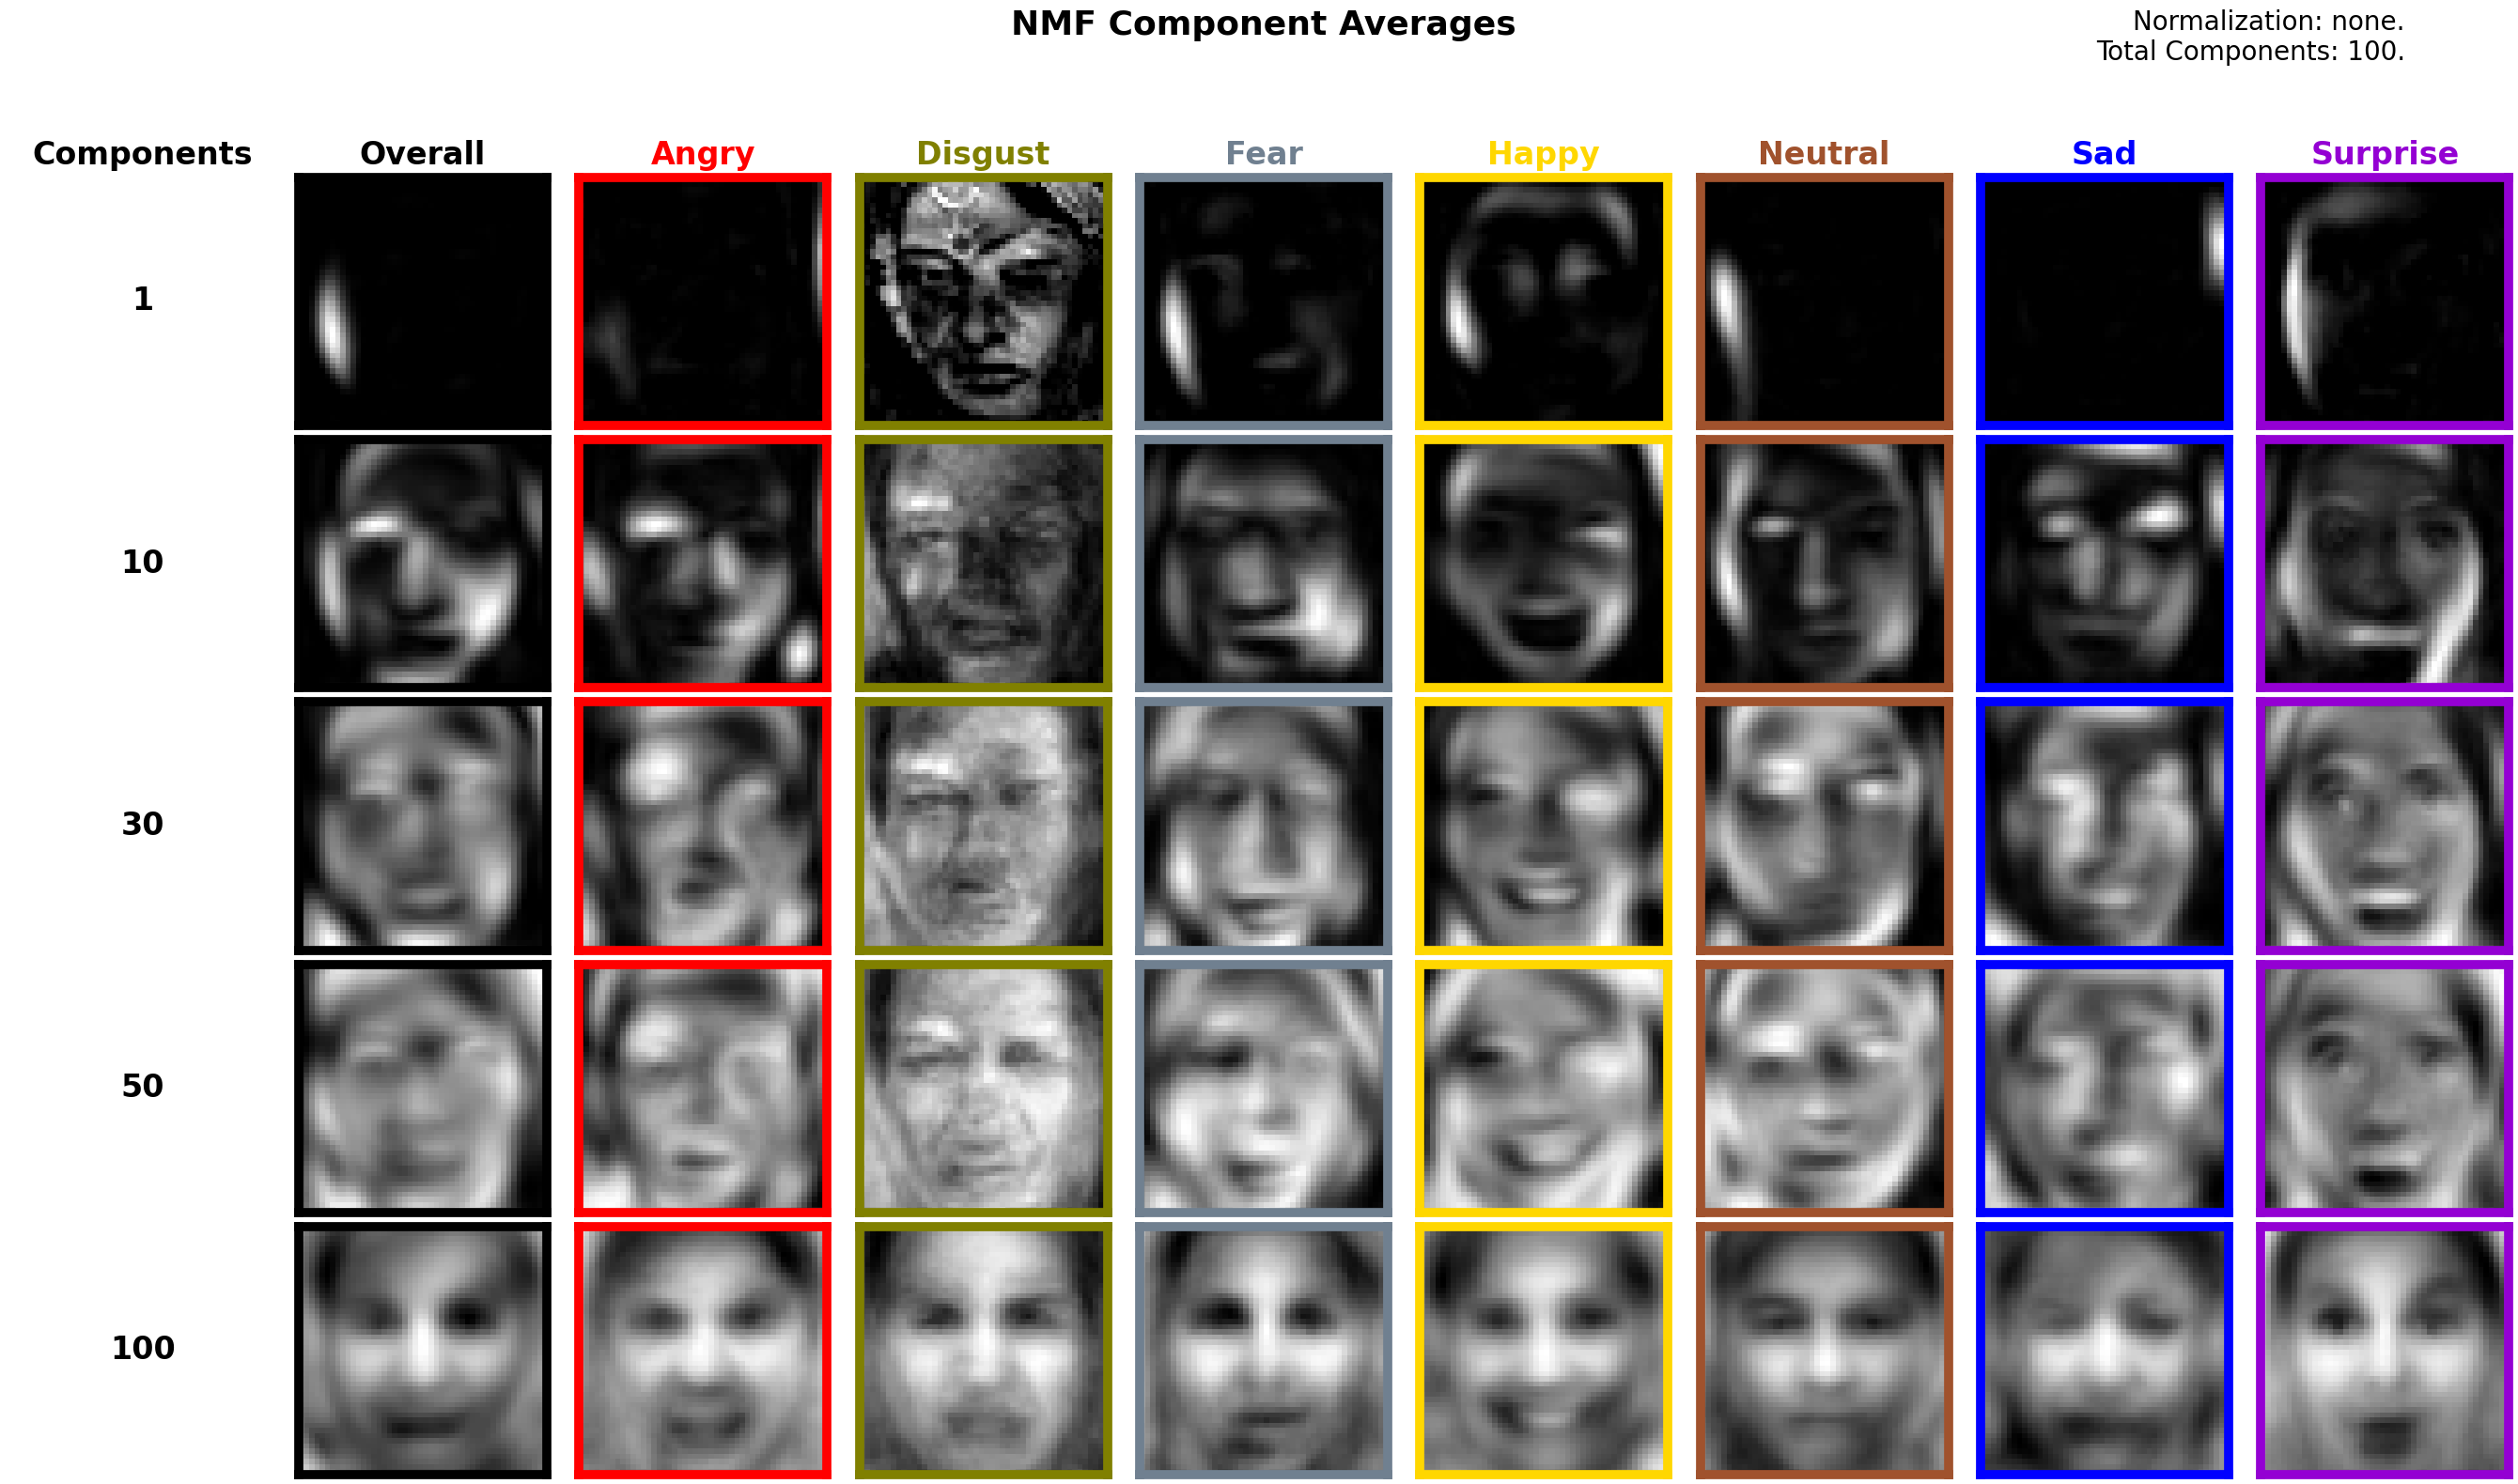

Saved matrix image of component averages to: models/unsupervised/nmf_none_100/component_averages_matrix.png.
Plot saved to models/unsupervised/nmf_none_100/reconstruction_matrix.png


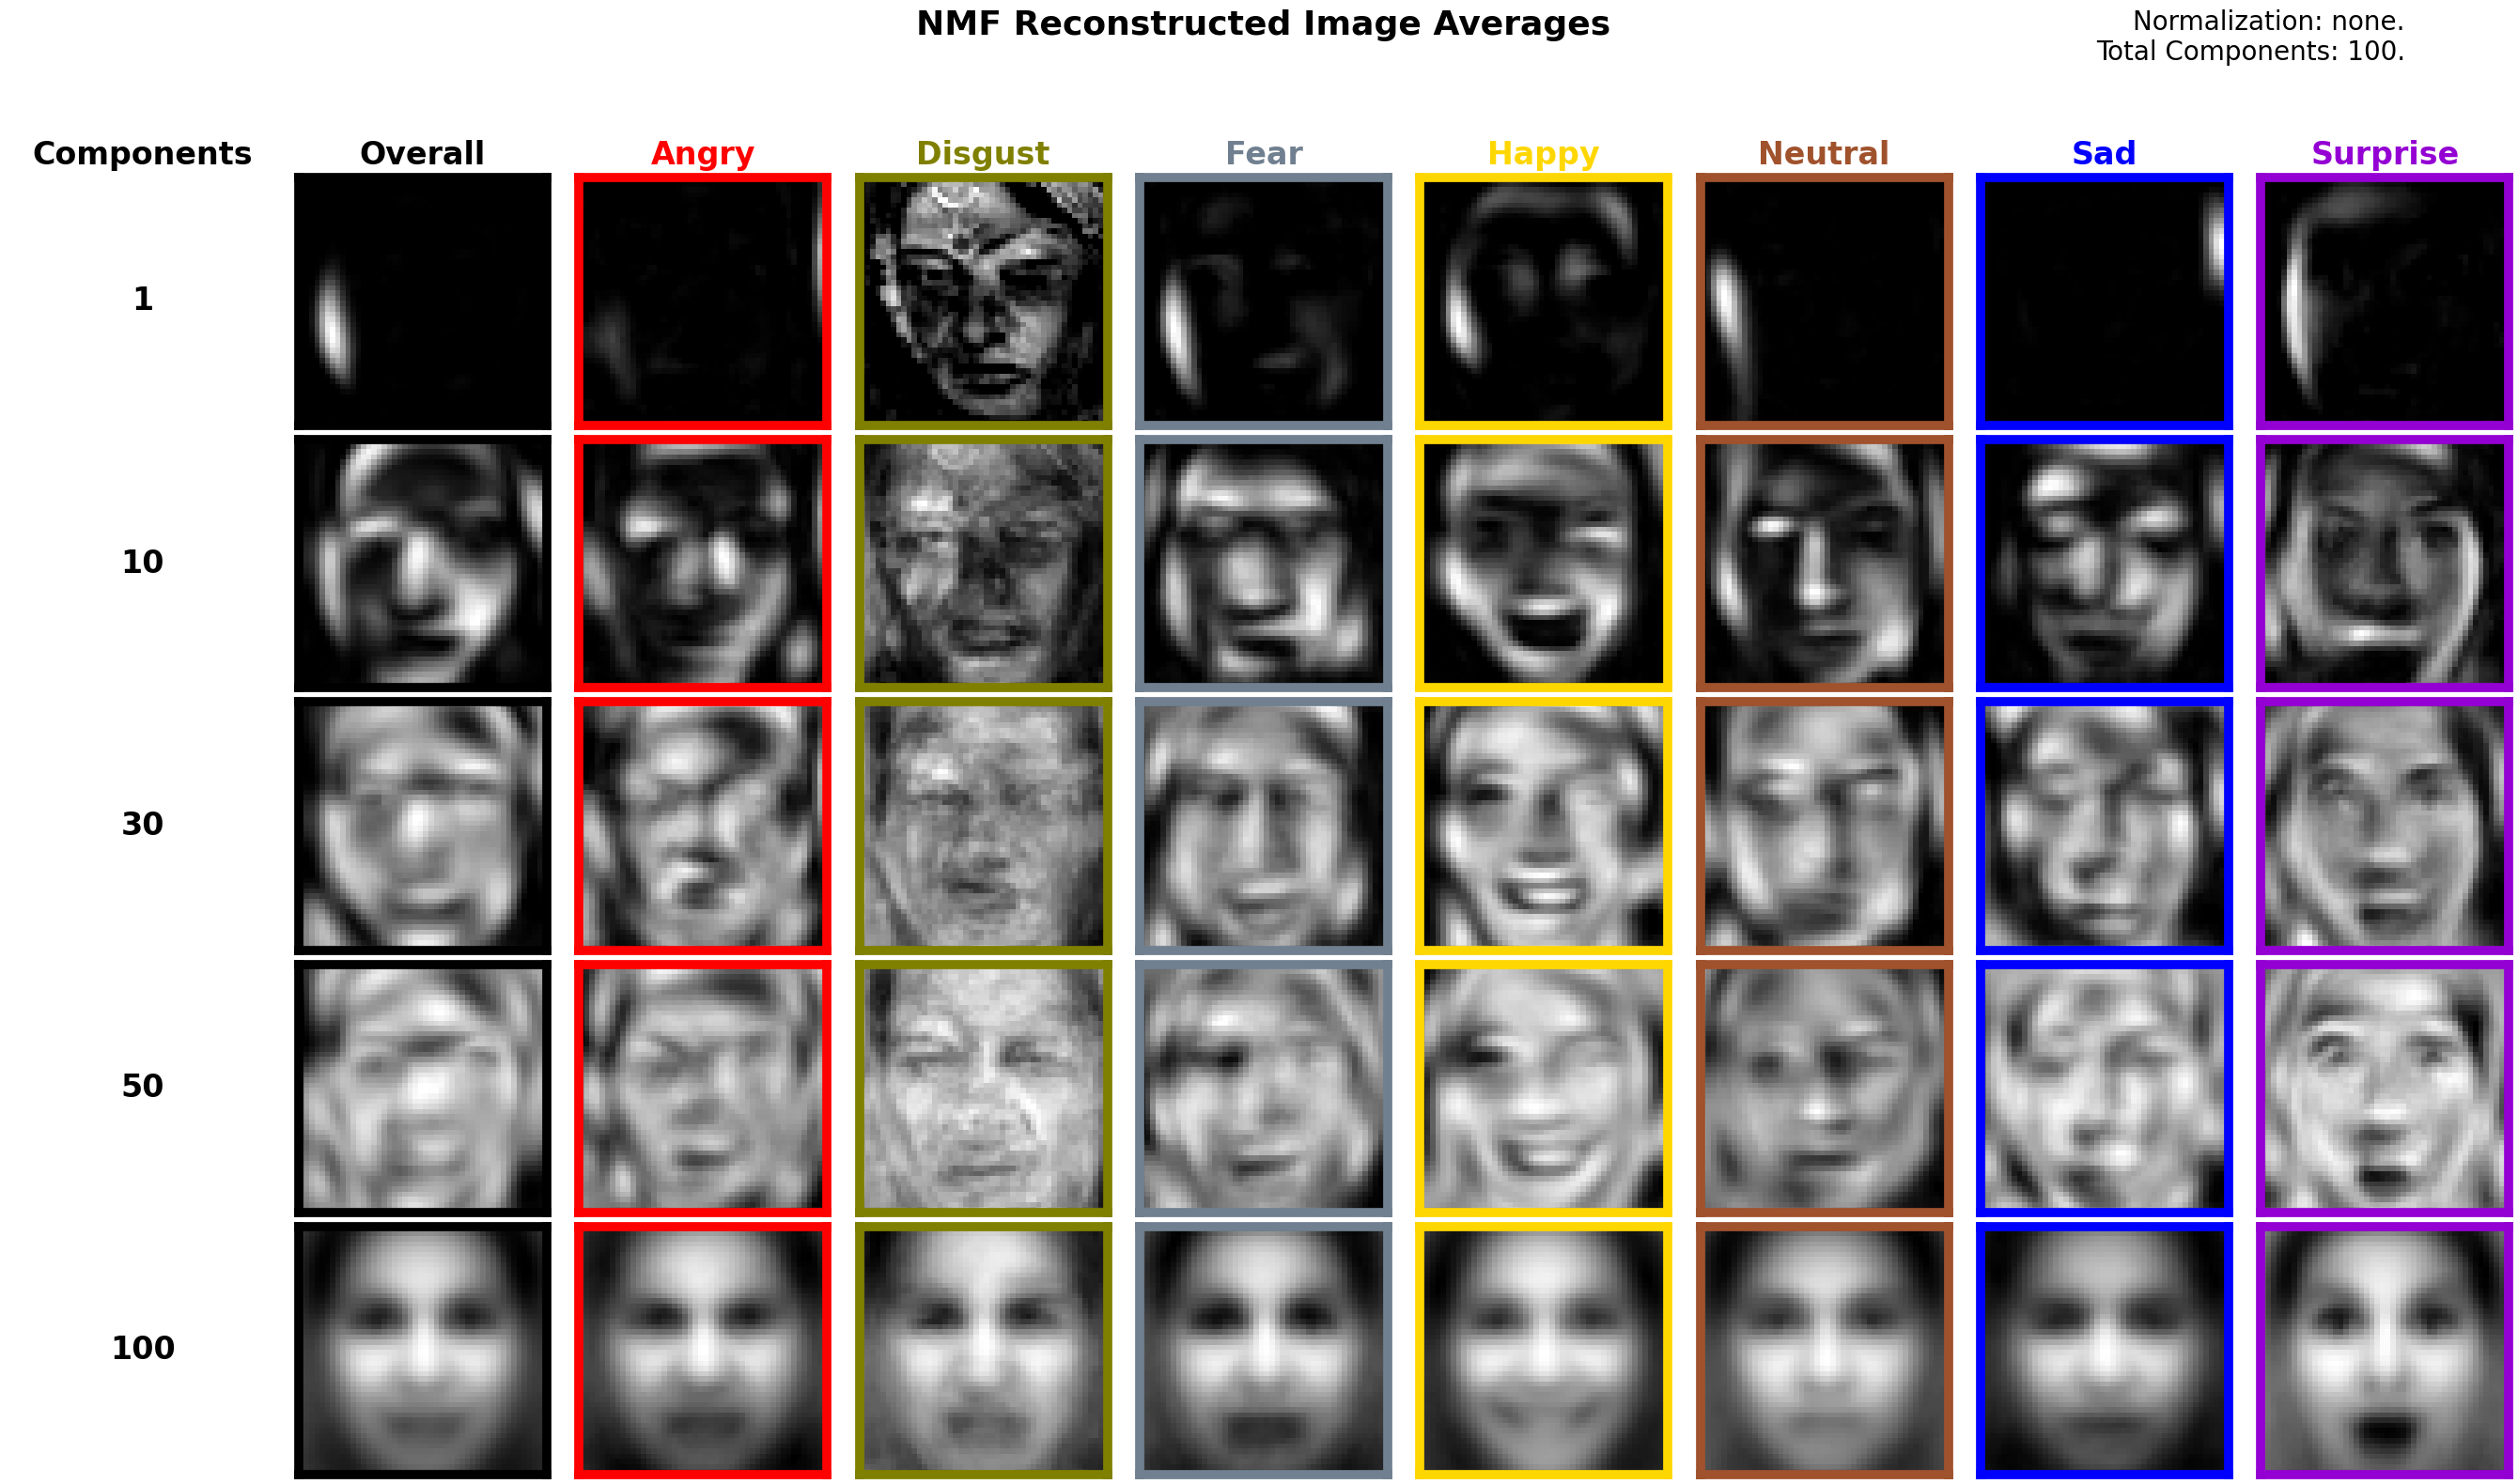

Saved matrix image of component averages to: models/unsupervised/nmf_none_100/reconstruction_matrix.png.
Current analysis complete.
Function run_single_analysis Took 1240.6815 seconds
Analysis settings:
{
    "module": "sklearn.decomposition",
    "class": "PCA",
    "normalization": "standard",
    "total_components": 100,
    "components_for_reconstruction": [
        1,
        10,
        30,
        50,
        100
    ],
    "params": {
        "svd_solver": "randomized",
        "whiten": true,
        "random_state": 42
    },
    "paths": {
        "base_dir": "models/unsupervised",
        "result_dir": "models/unsupervised/pca_standard_100",
        "log_path": "models/unsupervised/pca_standard_100/analysis_log.log",
        "json_path": "models/unsupervised/pca_standard_100/analysis_details.json",
        "npz_path": "models/unsupervised/pca_standard_100/analysis_data.npz",
        "component_path": "models/unsupervised/pca_standard_100/component_averages_matrix.png",
     

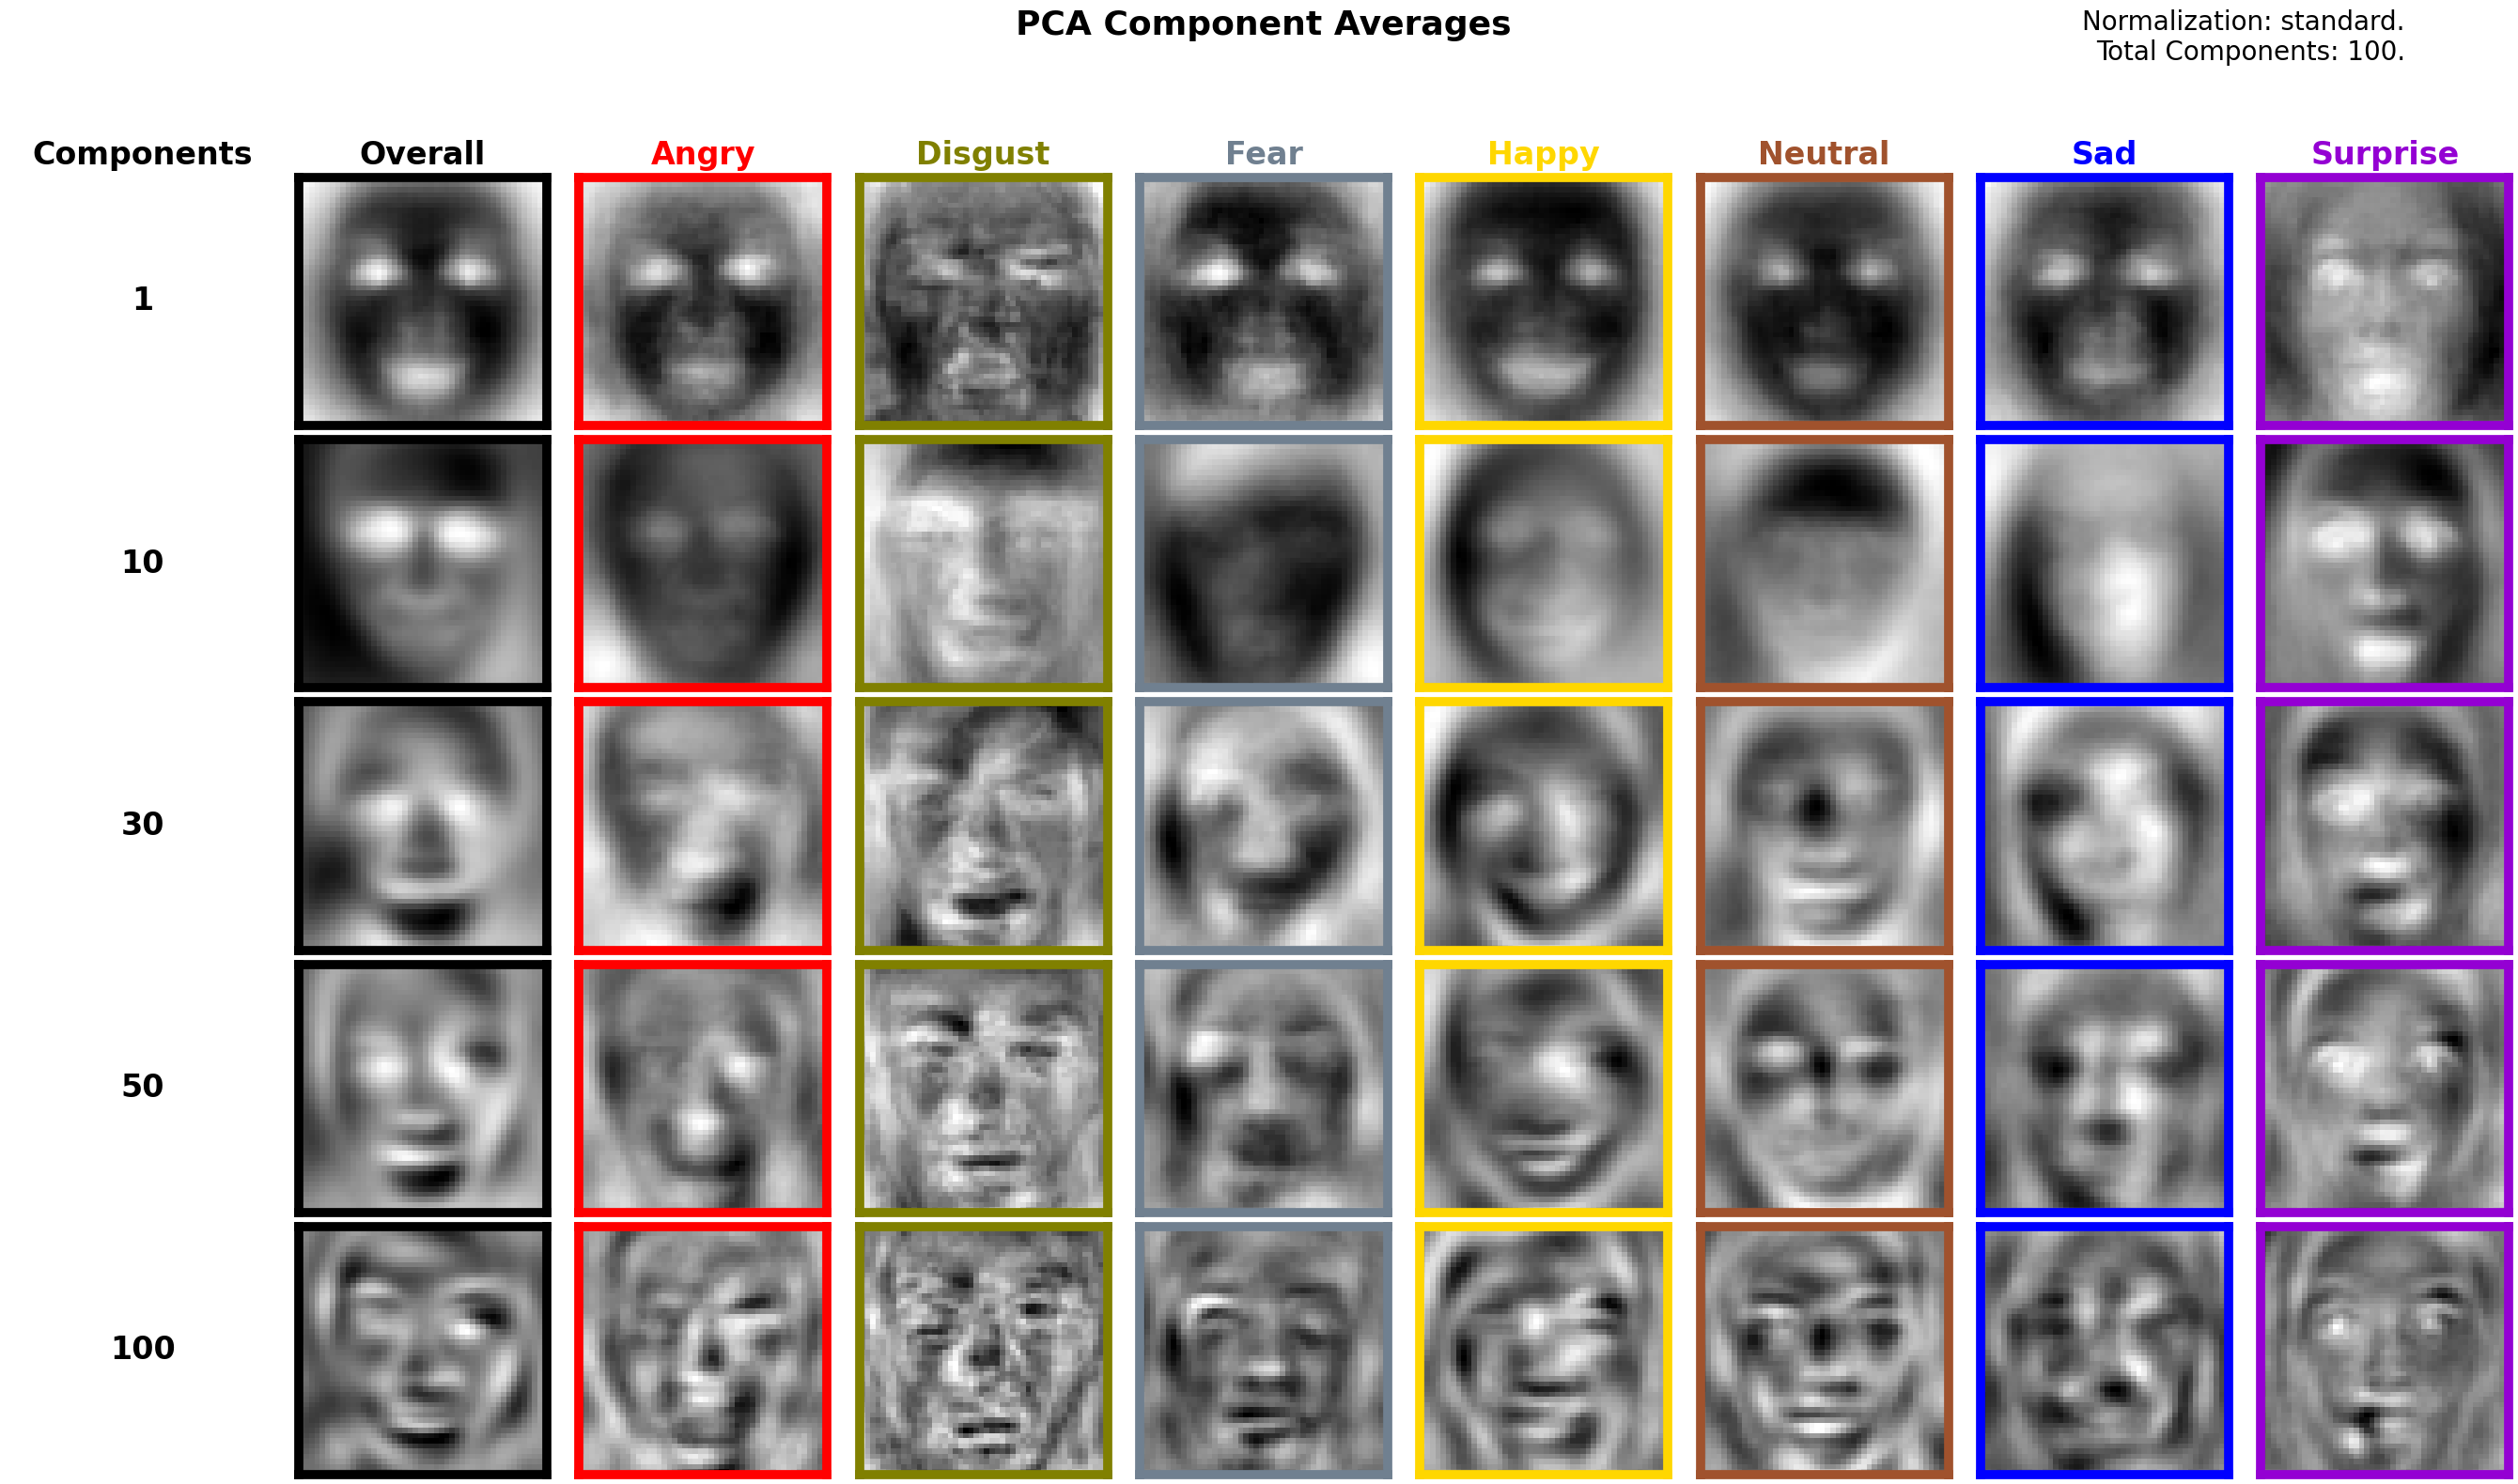

Saved matrix image of component averages to: models/unsupervised/pca_standard_100/component_averages_matrix.png.
Plot saved to models/unsupervised/pca_standard_100/reconstruction_matrix.png


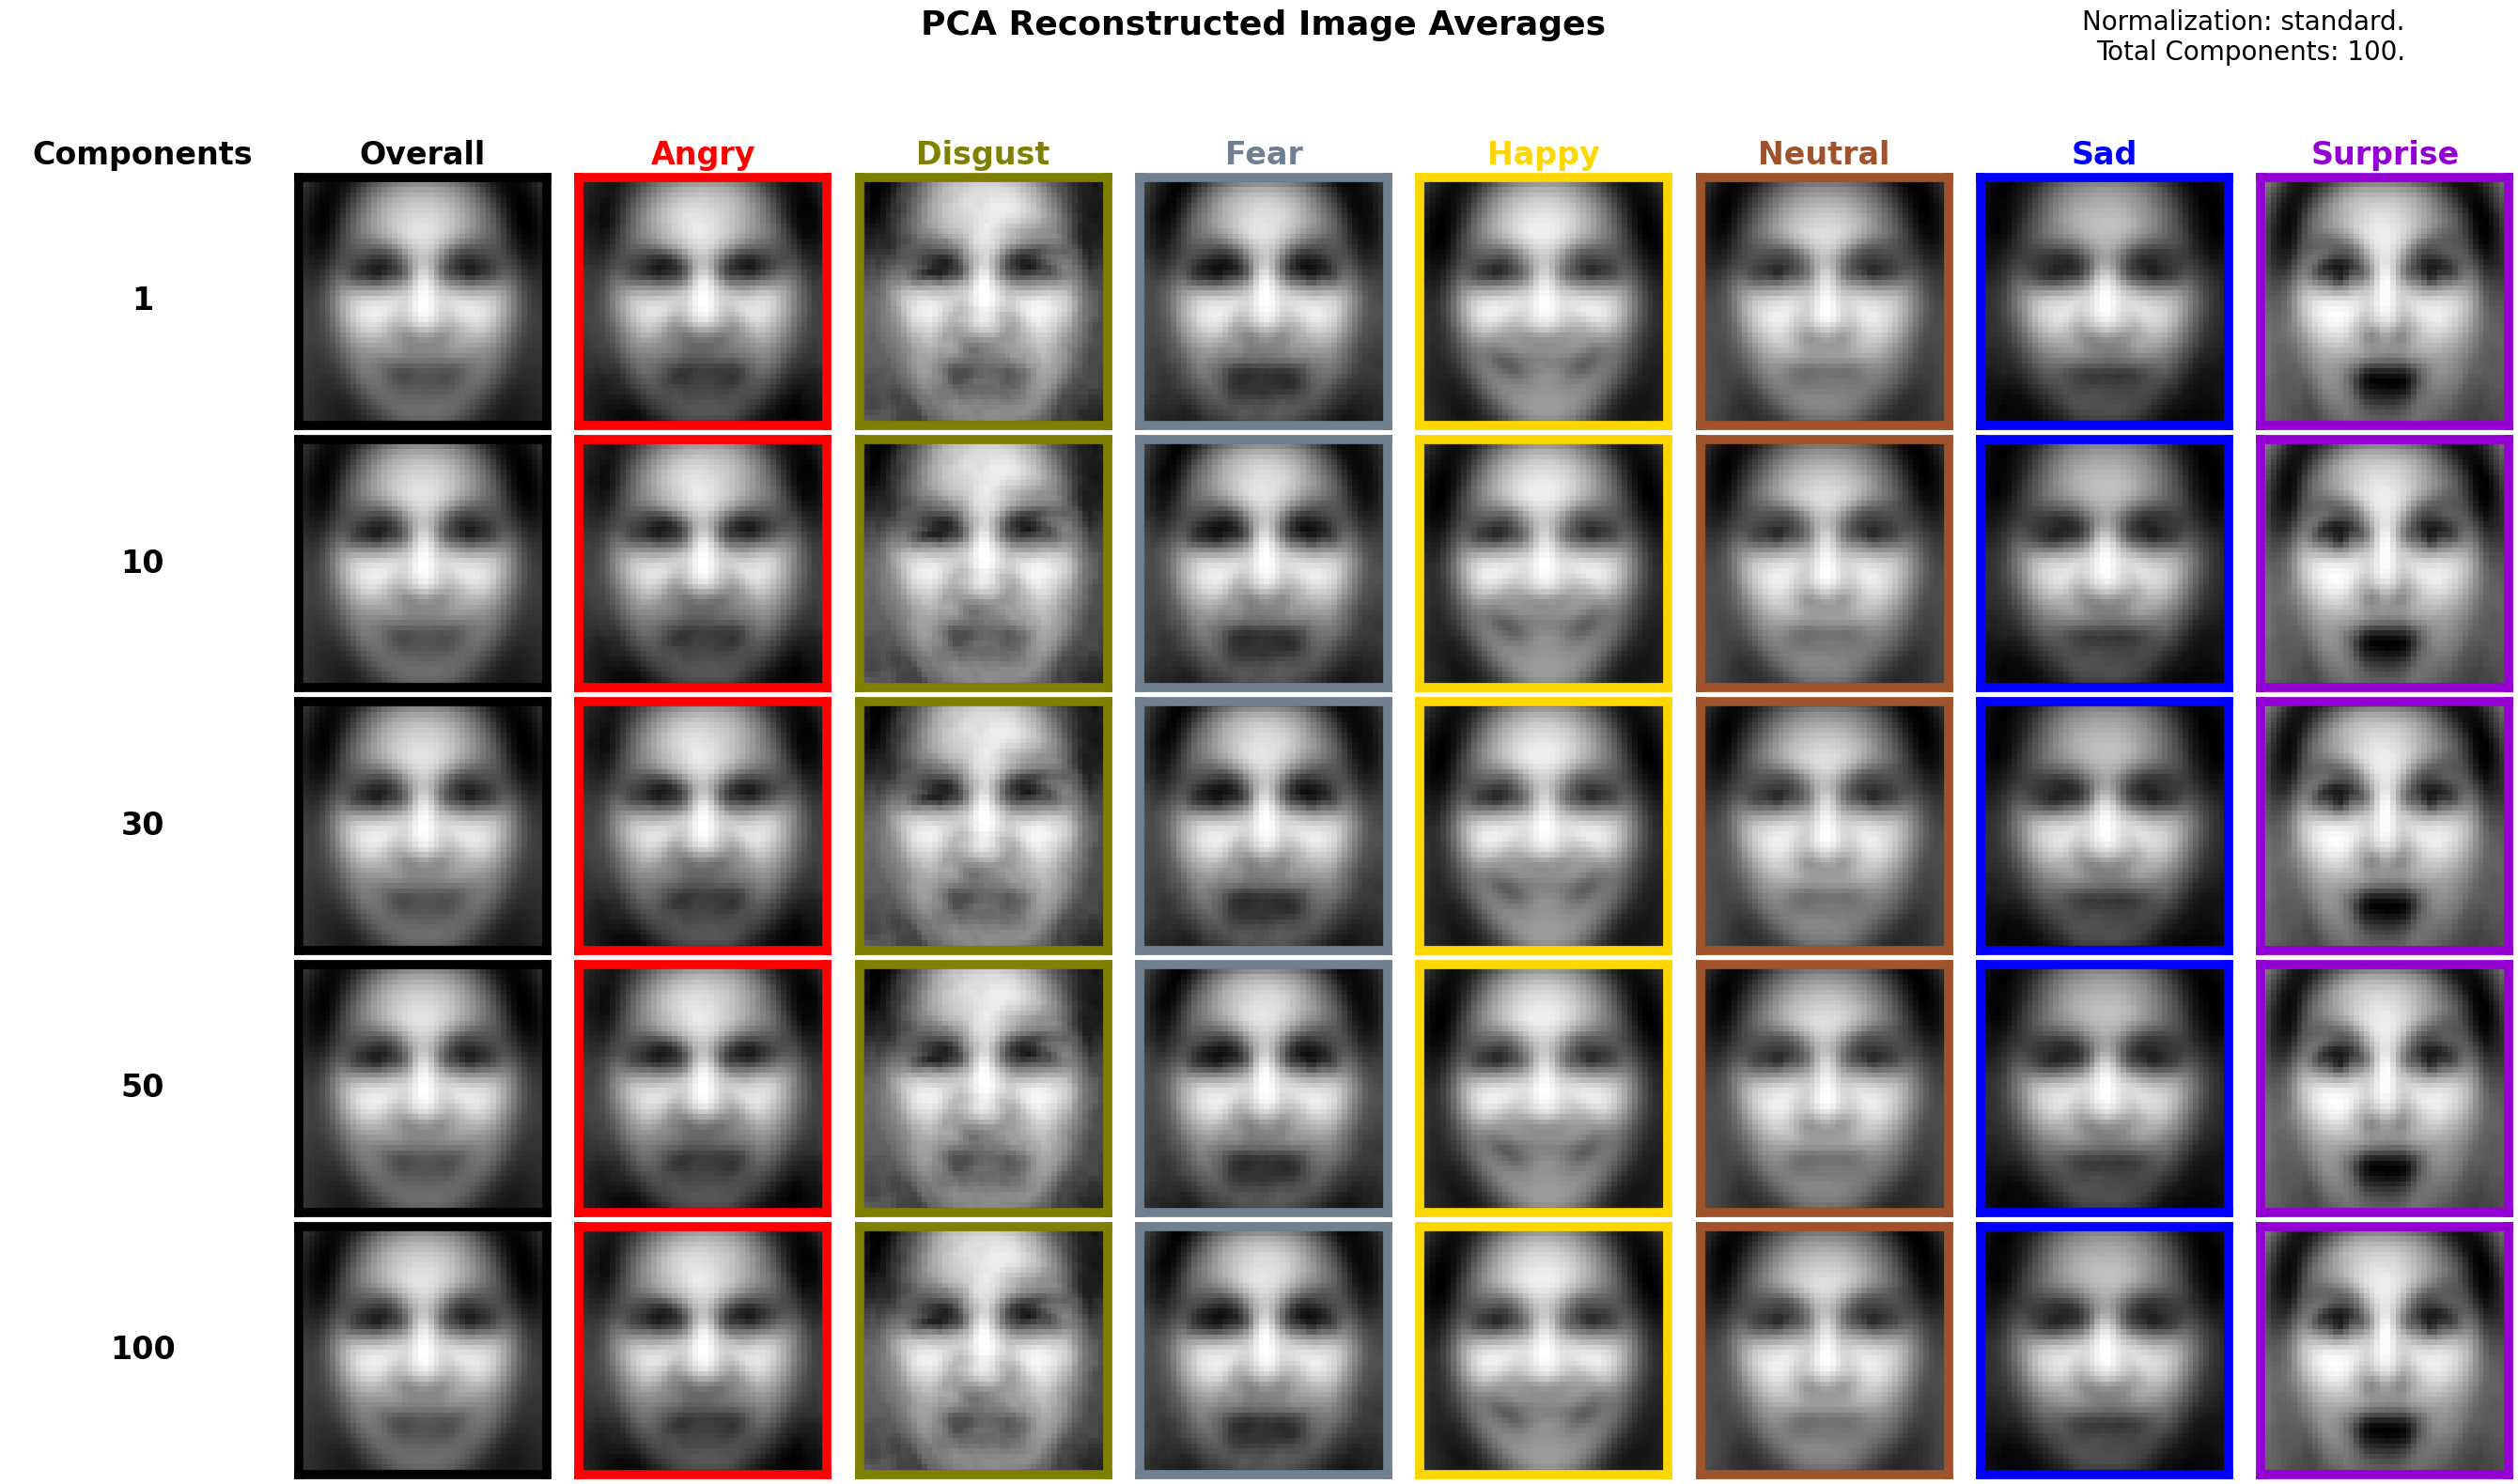

Saved matrix image of component averages to: models/unsupervised/pca_standard_100/reconstruction_matrix.png.
Current analysis complete.
Function run_single_analysis Took 165.3056 seconds


In [14]:
for model_name, model_details in model_dict.items():
    analysis_details = generate_analysis_paths(model_details)
    analysis_details['color_map'] = color_dict
    run_single_analysis(X_train, y_train, analysis_details)

In [15]:
print('Runs are done...')

Runs are done...
